In [5]:
import numpy as np
import matplotlib.pyplot as plt

#Q1

In [6]:
def u0(x):
  if x<=0:
    return 1
  if x>0:
    return 0

In [7]:
dim=100
a=-1
b=1
hx=(b-a)/dim
ht=hx/2
x=np.arange(a,b,hx)
t=np.arange(0,3,3*ht)
u=np.zeros(dim*dim).reshape((dim,dim))
for i in range(0,len(x)):
  u[0][i]=u0(x[i])

In [8]:
for l in range(len(t)-1):
  for k in range(len(x)-1,0,-1):
    u[l+1][k]= u[l][k]-(ht/hx)*(u[l][k])*(u[l][k]-u[l][k-1])
  u[l+1][0] = u[l][0]-(ht/hx)*(u[l][0])*(u[l][0]-u[l][-1])



In [9]:
def solu(x,t,n):
  sol=np.zeros(len(x))
  s = 1/2
  for i in range(len(x)):
    if x[i]<=s*t[n]:
      sol[i]=1
    else :
      sol[i]=0
  return sol
def f(u):
  return (u**2)/2
def s(u1,u0,f):
  return (f(u1)-f(u0))/(u1-u0)


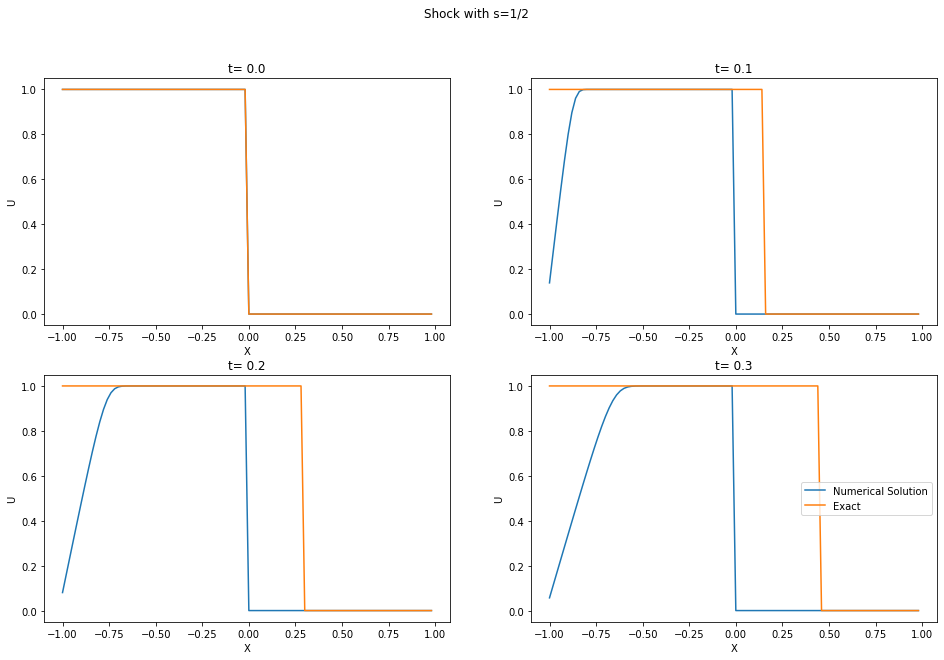

In [10]:

fig, axs = plt.subplots(2, 2,figsize=(16,10))

n=0
axs[0, 0].plot(x,u[n],label='Numerical Solution')
axs[0, 0].plot(x,solu(x,t,n),label='Exact')
axs[0, 0].set_title('t= '+ str(n*ht))
n=10
axs[0, 1].plot(x,u[n],label='Numerical Solution')
axs[0, 1].plot(x,solu(x,t,n),label='Exact')
axs[0, 1].set_title('t= '+ str(n*ht))
n=20
axs[1, 0].plot(x,u[n],label='Numerical Solution')
axs[1, 0].plot(x,solu(x,t,n),label='Exact')
axs[1, 0].set_title('t= '+ str(n*ht))
n=30
axs[1, 1].plot(x,u[n],label='Numerical Solution')
axs[1, 1].plot(x,solu(x,t,n),label='Exact')
axs[1, 1].set_title('t= '+ str(n*ht))
plt.legend()



for ax in axs.flat:
    ax.set(xlabel='X', ylabel='U')

plt.suptitle('Shock with s=1/2')
plt.savefig('q1 shock case11.png')

#Q3

In [11]:
def f(u):
  return (u**2)/2

def fprime(u):
  return u

def fstar(u0,u1,f,fprime):
  fp= [abs(fprime(u0)),abs(fprime(u1))]
  ak= max(fp)
  return (f(u0)+f(u1))/2 -(ak/2)*(u1-u0)

def u0(x):
  if x<0:
    return 2
  if (x<=1 and x>=0):
    return 2-x
  if (x>1):
    return 1



In [14]:
N=500
dx= 7/N
x= np.arange(-1,6,dx)
u= np.zeros(len(x))
for i in range(len(u)):
  u[i]= u0(x[i])
#padding
uz=u
a=u[0]
b=u[-1]
#u=np.insert(u,0,a)
#u=np.append(u,b)
T=2
t=0
dt= dx/(2*max(abs(u)))

In [15]:


while (t<T):
  u1= np.ones(len(x))

  for k in range(1,len(u)-1):
    u1[k]= u[k] +(dt/dx) *( fstar(u[k-1],u[k],f,fprime)- fstar(u[k], u[k+1],f,fprime) )
  u1[0]=u[0] +(dt/dx) *( fstar(a,u[0],f,fprime)- fstar(u[0], u[1],f,fprime) )
  u1[-1]=u[-1] +(dt/dx) *( fstar(u[-2],u[-1],f,fprime)- fstar(u[-1], b,f,fprime) )
  u=u1
  dt= dx/(2*max(abs(u)))
  t=t+dt


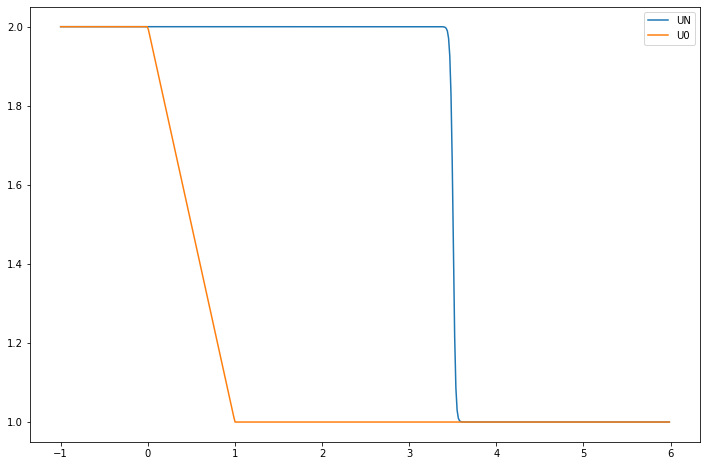

In [16]:
plt.figure(figsize=(12,8))
plt.plot(x,u,label='UN')
plt.plot(x,uz,label='U0')
plt.legend()
plt.show()

In [17]:
def LLF_integrate(Nx,T,u0):

  def f(u):
    return (u**2)/2

  def fprime(u):
    return u

  def fstar(u0,u1,f,fprime):
    fp= [abs(fprime(u0)),abs(fprime(u1))]
    ak= max(fp)
    return (f(u0)+f(u1))/2 -(ak/2)*(u1-u0)

  dx= 7/Nx
  x= np.arange(-1,6,dx)
  u= np.zeros(len(x))
  for i in range(len(u)):
    u[i]= u0(x[i])
  a=u[0]
  b=u[-1]

  t=0
  dt= dx/(2*max(abs(u)))
  while (t<T):
    u1= np.ones(len(x))

    for k in range(1,len(u)-1):
      u1[k]= u[k] +(dt/dx) *( fstar(u[k-1],u[k],f,fprime)- fstar(u[k], u[k+1],f,fprime) )
    u1[0]=u[0] +(dt/dx) *( fstar(a,u[0],f,fprime)- fstar(u[0], u[1],f,fprime) )
    u1[-1]=u[-1] +(dt/dx) *( fstar(u[-2],u[-1],f,fprime)- fstar(u[-1], b,f,fprime) )
    u=u1
    dt= dx/(2*max(abs(u)))
    t=t+dt

  
  return x,u

def Godunov_integrate(Nx,T,u0):
  def f(u):
    return (u**2)/2

  def fprime(u):
    return u

  def fstar(u0,u1,f,fprime):
    if u0<u1:
      if (u1-u0) != 0:
        s= (f(u1)-f(u0))/(u1-u0)
        if s>0:
          return f(u0)
        if s<=0:
          return f(u1)

    if fprime(u0)>=0:
      return  f(u0)
    if fprime(u1)<=0:
      return f(u1)

  dx= 7/Nx
  x= np.arange(-1,6,dx)
  u= np.zeros(len(x))
  for i in range(len(u)):
    u[i]= u0(x[i])
  a=u[0]
  b=u[-1]

  t=0
  dt= dx/(2*max(abs(u)))

  while (t<T):
    u1= np.ones(len(x))

    for k in range(1,len(u)-1):
      u1[k]= u[k] +(dt/dx) * (fstar(u[k-1],u[k],f,fprime)-fstar(u[k],u[k+1],f,fprime))
      
    u1[0]=u[0] +(dt/dx) * (fstar(a,u[0],f,fprime)-fstar(u[0],u[1],f,fprime))
    u1[-1]=u[-1] +(dt/dx) *(fstar(u[-2],u[-1],f,fprime)-fstar(b,u[-1],f,fprime))
    u=u1
    dt= dx/(2*max(abs(u)))
    t=t+dt

    
    

  return x, u


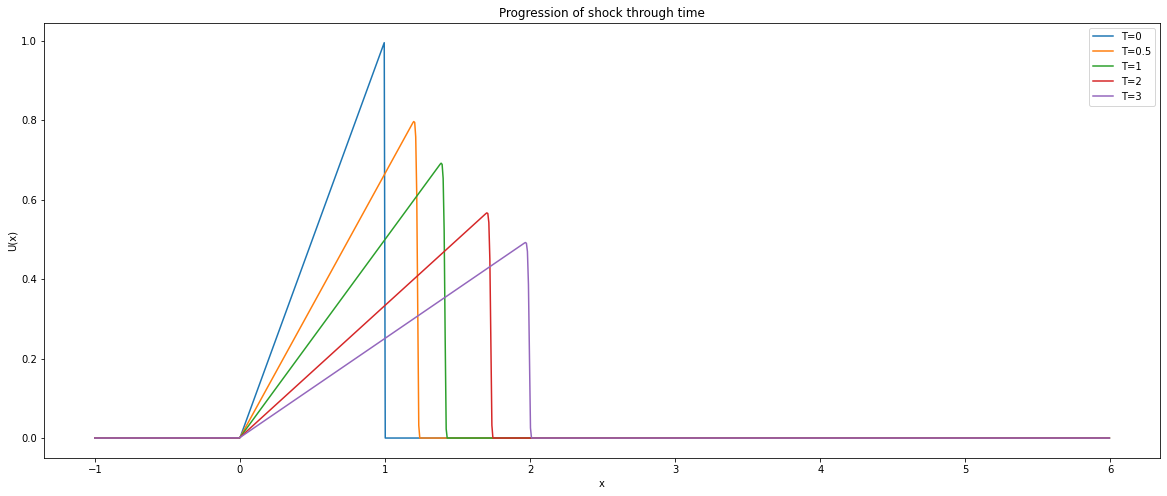

In [20]:
def u0(x):
  if x<0:
    return 0
  if x>=0 and x<=1:
    return x
  if x>1:
    return 0
 

plt.figure(figsize=(20,8))

x,u=LLF_integrate(1000,0,u0)
plt.plot(x,u,label='t=0')

x,u=LLF_integrate(1000,1/2,u0)
plt.plot(x,u,label='t=0.5')

x,u=LLF_integrate(1000,1,u0)
plt.plot(x,u,label='t=1')

x,u=LLF_integrate(1000,2,u0)
plt.plot(x,u,label='t=2')
plt.grid()

x,u=LLF_integrate(1000,3,u0)
plt.plot(x,u,label='t=3')
plt.grid()

plt.xlabel('x')
plt.ylabel('U(x)')
plt.title("Progression of shock through time")
plt.legend()
plt.show()

In [ ]:
def func(T,u0,godunov,rare):
  n= np.array([100,200,400,800])
  if godunov== True:
      plt.figure(figsize=(12,8))
      for i in range(len(n)):
        x,u=Godunov_integrate(n[i],T,u0)
        plt.plot(x,u,label=n[i])
      if rare==True:
        plt.plot(x,rarifiy(T,x),label='Exact')
        plt.legend()
        plt.title('Godunov scheme for Rarefaction for T=' +str(T))
        plt.savefig('q3 Godunov Rarefaction.png')
      else:
        plt.plot(x,shock2(T,x),label='Exact')
        plt.legend()
        plt.title('Godunov scheme for Shock for T=' +str(T))
        plt.savefig('q3 Godunov shock.png')
 
  else:
      plt.figure(figsize=(12,8))
      for i in range(len(n)):
        x,u=LLF_integrate(n[i],T,u0)
        plt.plot(x,u,label=n[i])
      if rare==True:
        plt.plot(x,rarifiy(T,x),label='Exact')
        plt.legend()
        plt.title('LLF scheme for Rarefaction for T=' +str(T))
        plt.savefig('q3 LLF Rarefaction.png')
      else:
        plt.plot(x,shock2(T,x),label='Exact')
        plt.legend()
        plt.title('LLF scheme for Shock for T=' +str(T))
        plt.savefig('q3 LLF shock.png')
    


  
def rarifiy(T,x):
  u=np.zeros(len(x))
  for i in range(len(u)):
    if x[i]<T:
      u[i]=1
    if x[i]>T and x[i]<2*T+1:
      u[i]=(1/(T+1))*x[i]+1/(T+1)
    if x[i]> (2*T+1):
      u[i]= 2
  return u

def shock2(T,x):
  u=np.zeros(len(x))
  for i in range(len(u)):
    if x[i]<3.5:
      u[i]=2
    if x[i]>=3.5:
      u[i]=1
  return u 
def shock12(T,x):
  u=np.zeros(len(x))
  for i in range(len(u)):
    if x[i]<1:
      u[i]=2
    if x[i]>1 and x[i]<1.5:
      u[i]=-2*x[i]+4
    if x[i]> 1.5:
      u[i]= 1
  return u


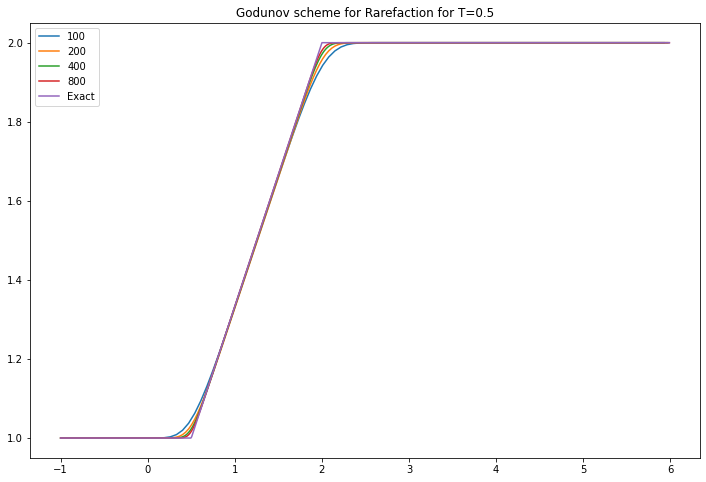

In [ ]:
func(1/2,u0,True,True)

In [ ]:

\